## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import accuracy_score

## Real Dataset

In [2]:
iris=pd.read_csv('C:\python\Datasets\Iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


## Divide data into features and labels

In [4]:
x=iris.iloc[:,:-1]
x.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [5]:
y=iris.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

## label incoding

In [6]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

y=LE.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

## Split data into training and test sets

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.33)

## Evaluate alternative K-values for better predictions 


In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
k_list=list(range(1,50,2))
err_rate=[]
for i in k_list:
    classifier=KNeighborsClassifier(n_neighbors=i)
    classifier.fit(x_train,y_train)
    y_predict=classifier.predict(x_test)
    err_rate.append(1-accuracy_score(y_test,y_predict))

In [10]:
df1=pd.DataFrame({'k':k_list,'err_rate':err_rate})
df1

,k,err_rate
0,1,0.0
1,3,0.0
2,5,0.0
3,7,0.0
4,9,0.0
5,11,0.0
6,13,0.0
7,15,0.0
8,17,0.0
9,19,0.0


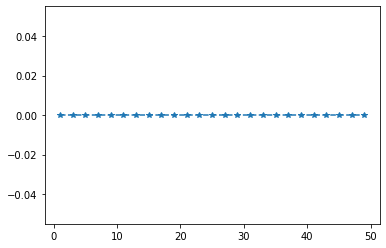

In [11]:
plt.plot(k_list,err_rate,'--*')

## Create and train model

In [12]:
classifier=KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

## Make predictions with the model

In [13]:
y_predict=classifier.predict(x_test)
y_predict

array([0, 2, 1, 0, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0, 0,
       2, 0, 0, 1, 0, 1, 2, 0, 1, 2, 1, 0, 0, 2, 1, 2, 1, 1, 1, 2, 2, 1,
       0, 1, 0, 2, 0, 2], dtype=int64)

## Evaluate the predictions

In [14]:
from sklearn.metrics import  confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_predict)
print(cm)
print("accuracy of the model is",accuracy_score(y_test,y_predict)*100,"%" )

[[18  0  0]
 [ 0 16  0]
 [ 0  0 16]]
accuracy of the model is 100.0 %


## Plot error rate

In [15]:
print("Best k:",k_list[err_rate.index(min(err_rate))])

Best k: 1


## Adjust K value per error rate evaluations

In [16]:
classifier=KNeighborsClassifier(n_neighbors=9)
classifier.fit(x_train,y_train)
y_predict=classifier.predict(x_test)
print("Accuracy of the model is",accuracy_score(y_test,y_predict),"%")
print('Error of the model is',round(1-accuracy_score(y_test,y_predict)))

Accuracy of the model is 1.0 %
Error of the model is 0
